In [49]:
import numpy as np
import nltk
from os.path import join
import json
import matplotlib.pyplot as plt

In [16]:
data_dir = 'data'
t_q_json_file = join(data_dir, 'vqa/v2_OpenEnded_mscoco_train2014_questions.json')
t_a_json_file = join(data_dir, 'vqa/v2_mscoco_train2014_annotations.json')

v_q_json_file = join(data_dir, 'vqa/v2_OpenEnded_mscoco_val2014_questions.json')
v_a_json_file = join(data_dir, 'vqa/v2_mscoco_val2014_annotations.json')

print("Loading Training questions")
with open(t_q_json_file) as f:
    t_questions = json.loads(f.read())

print("Loading Training answers")
with open(t_a_json_file) as f:
    t_answers = json.loads(f.read())

print("Loading Val questions")
with open(v_q_json_file) as f:
    v_questions = json.loads(f.read())

print("Loading Val answers")
with open(v_a_json_file) as f:
    v_answers = json.loads(f.read())

print("train|val (original ans)", len(t_answers['annotations']), len(v_answers['annotations']))
print("train|val (original que)", len(t_questions['questions']), len(v_questions['questions']))

answers = t_answers['annotations'] + v_answers['annotations']
questions = t_questions['questions'] + v_questions['questions']


Loading Training questions
Loading Training answers
Loading Val questions
Loading Val answers
train|val (original ans) 443757 214354
train|val (original que) 443757 214354


In [26]:
v_questions.keys(), v_answers.keys()

(dict_keys(['info', 'task_type', 'data_type', 'license', 'data_subtype', 'questions']),
 dict_keys(['info', 'license', 'data_subtype', 'annotations', 'data_type']))

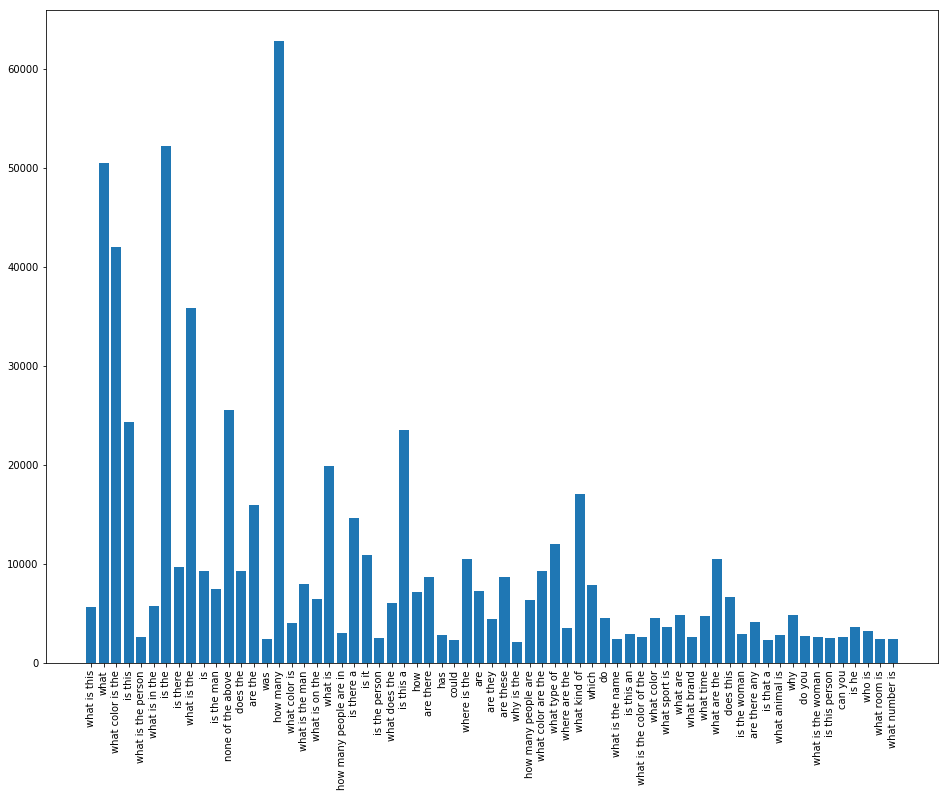

In [50]:
qTypes = {}
for ans in answers:
    aType = ans['question_type']
    if aType not in qTypes:
        qTypes[aType] = 0
    else:
        qTypes[aType] += 1
        
ind = np.arange(len(qTypes)) 
plt.figure(figsize=(16,12))
plt.bar(ind, list(qTypes.values()))
_ = plt.xticks(ind, list(qTypes.keys()), rotation='vertical')

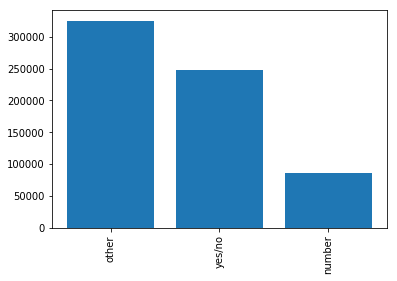

In [52]:
aTypes = {}
for ans in answers:
    aType = ans['answer_type']
    if aType not in aTypes:
        aTypes[aType] = 0
    else:
        aTypes[aType] += 1
        
ind = np.arange(len(aTypes)) 
plt.bar(ind, list(aTypes.values()))
_ = plt.xticks(ind, list(aTypes.keys()), rotation='vertical')

In [59]:
questions[0]

{'image_id': 458752,
 'question': 'What is this photo taken looking through?',
 'question_id': 458752000}

In [58]:
answers[0]

[{'question_type': 'none of the above',
  'multiple_choice_answer': 'down',
  'answers': [{'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 1},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 2},
   {'answer': 'at table', 'answer_confidence': 'yes', 'answer_id': 3},
   {'answer': 'skateboard', 'answer_confidence': 'yes', 'answer_id': 4},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 5},
   {'answer': 'table', 'answer_confidence': 'yes', 'answer_id': 6},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 7},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 8},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 9},
   {'answer': 'down', 'answer_confidence': 'yes', 'answer_id': 10}],
  'image_id': 262148,
  'answer_type': 'other',
  'question_id': 262148000},
 {'question_type': 'what are the',
  'multiple_choice_answer': 'watching',
  'answers': [{'answer': 'spectating',
    'answer_confidence': 'yes',
    'an